In [1]:
%load_ext autoreload
%autoreload 2

# Import Python packages
import pickle

# Import Third party packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set plotting parameters
global_params = {'figure.dpi': 300,
                 'text.usetex': True,
                 'text.latex.preamble': r"\usepackage{amsmath}",
                 'font.family': 'sans-serif',
                 'savefig.dpi': 300,
                 'savefig.bbox': 'tight',
                 'savefig.pad_inches': 0.025,
                 'savefig.transparent': True,
                 #'font.sans-serif': 'Computer Modern Roman',
                }

full_params = {'figure.figsize': (7.3, 3.65),
               'figure.titlesize': 12,
               'axes.labelsize': 10,
               'axes.titlesize': 12,
               'legend.fontsize': 10,
               'xtick.labelsize': 12,
               'ytick.labelsize': 12,
              }

half_params = {'figure.figsize': (3.5, 2.5),
               'figure.titlesize': 10,
               'lines.linewidth' : 1,
               'lines.markersize' : 6,
               'lines.markeredgewidth': 0.5,
               'axes.labelsize': 9,
               'axes.titlesize': 9,
               'axes.linewidth': 0.5,
               'legend.fontsize': 9,
               'xtick.labelsize': 9,
               'ytick.labelsize': 9,
               'xtick.major.width': 0.5,
               'ytick.major.width': 0.7,
               'ytick.minor.width': 0.5,
               'ytick.major.pad': 0.0,
              }

# Add global parameters to the full_params and half_params dictionaries
full_params.update(global_params)
half_params.update(global_params)

# Boolean determining if figures should be saved (all figures or summary-only)
saveallfigs = True
savesumfigs = False

In [3]:
S1_terms = ['u', 'du/dx', 'f']
S2_terms = ['u', 'du/dx', 'f', 'u^{2}']
S3_terms = ['du/dx', 'f']
S4_terms = ['f']

true_terms = [S1_terms, S2_terms, S3_terms, S4_terms]
tags = ["S1", "NLSL", "S3", "S4"]

In [4]:
def score_p(results, true_coeffs):
    for result in results:
        len_diff = int((len(true_coeffs['p'])-len(result['p']))/2)
        diff = true_coeffs['p'][len_diff:-len_diff] - result['p']
        score = np.linalg.norm(diff)
        score = score/np.linalg.norm(true_coeffs['p'][len_diff:-len_diff])
        result['score'] = score
    return results

In [5]:
tags = ["S1", "NLSL", "S3", "S4"]
true_files = ["S1-LSL-coeffs.pickle","S2-NLSL-coeffs.pickle","S3-P2-coeffs.pickle","S4-EB-coeffs.pickle"]

# Create empty list for plotting
plot_lists_5a = []

# Prepare the results list
for tag, tf in zip(tags, true_files):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig5a-{}-".format(tag)
    
    true_coeffs = pickle.load(open("./data/{}".format(tf), "rb"))
    
    results = pickle.load(open(file_stem +"results.pickle", "rb"))

    # Prepare lists for plotting
    plot_nm = [result['noise_mag'] for result in results]
    plot_nm = [1/nm for nm in plot_nm]
    results = score_p(results, true_coeffs)
    plots_sc = [result['score'] for result in results]
    plots_sc = [min(score,1) for score in plots_sc]
    
    # save to plot_lists:
    plot_lists_5a.append([plot_nm, plots_sc])


# Create empty list for plotting
plot_lists_5b = []

# Prepare the results list
for tag, tf in zip(tags, true_files):
    # define file stem, load data, compute spurious terms
    file_stem = "./data/Fig5b-{}-".format(tag)
    
    true_coeffs = pickle.load(open("./data/{}".format(tf), "rb"))
    
    results = pickle.load(open(file_stem +"results.pickle", "rb"))

    # Prepare lists for plotting
    plot_trials = [result['num_trials'] for result in results]
    results = score_p(results, true_coeffs)
    plots_sc = [result['score'] for result in results]
    plots_sc = [min(score,1) for score in plots_sc]
    
    # save to plot_lists:
    plot_lists_5b.append([plot_trials, plots_sc])

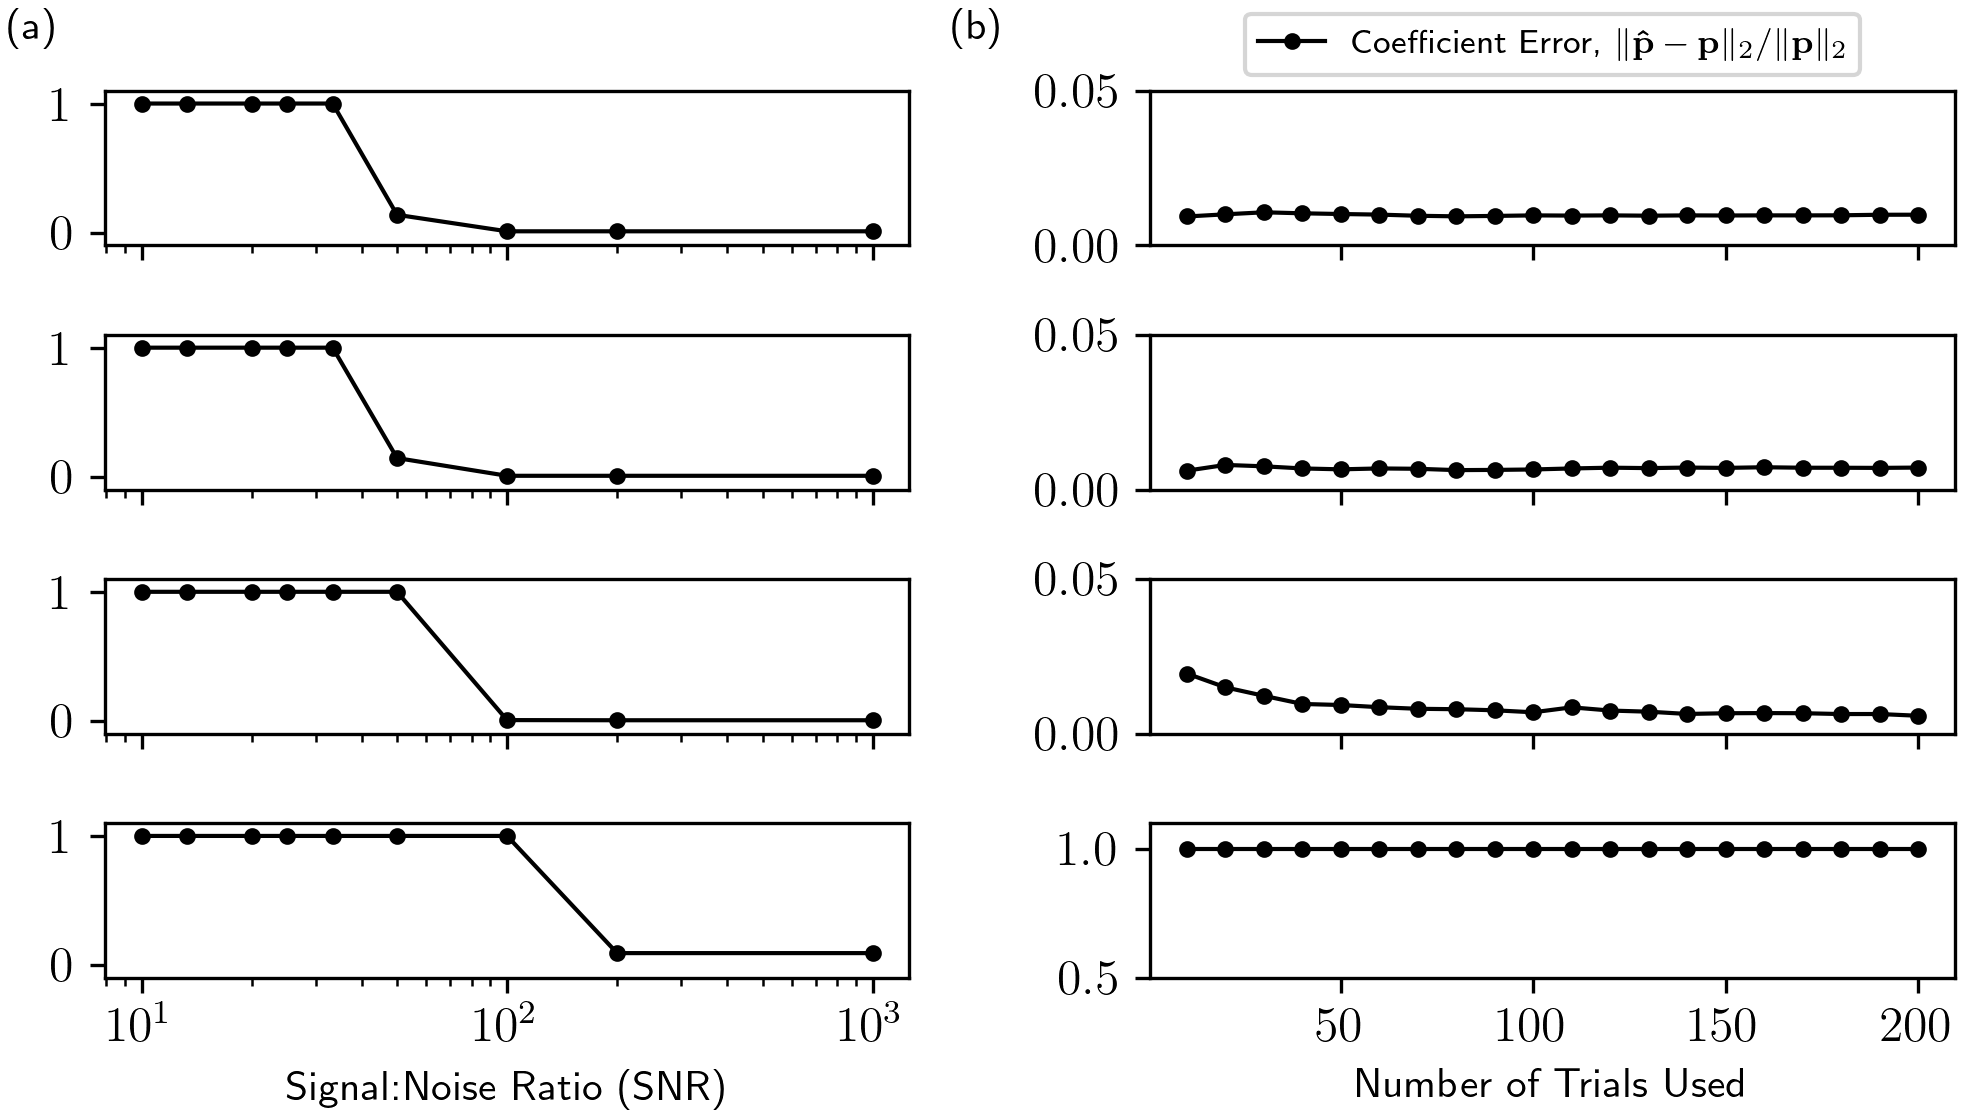

In [29]:
full_params['figure.figsize'] = (7,4)
full_params['lines.linewidth'] = 1
full_params['lines.markersize'] = 3
plt.rcParams.update(full_params)

# Plot line style for loss lines:
pltstyle=dict(linestyle=None,marker='o')

# Create figure
fig, axs = plt.subplots(4,2, sharex='col')

# Grab the axes for each of the two parts of the figure:
axs_5a = axs[:,0].flatten()
axs_5b = axs[:,1].flatten()

# Label (a):
axs_5a[0].text(0.05, 0.93, "(a)", transform=fig.transFigure)

for ax1, plot_list in zip(axs_5a,plot_lists_5a):
    # Get the results:
    plot_nm, plots_sc = plot_list
    
    # plot data
    ax1.semilogx(plot_nm, plots_sc, color='black', label = "p(x) Error", **pltstyle)
 
    # Place the legend
    lines = ax1.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    # Set ylims
    ax1.set_ylim([-0.1,1.1])
    
# Set X-axis label
axs_5a[-1].set_xlabel("Signal:Noise Ratio (SNR)")

# Label (b):
axs_5b[0].text(0.5, 0.93, "(b)", transform=fig.transFigure)

label = "Coefficient Error, $\lVert \mathbf{\hat{p}}-\mathbf{p} \lVert_2 / \lVert \mathbf{p} \lVert_2$"

for i, (ax1, plot_list) in enumerate(zip(axs_5b, plot_lists_5b)):
    # Get the results:
    plot_trials, plots_sc = plot_list
    
    # plot data
    ax1.plot(plot_trials, plots_sc, 'o-', color='k', label=label)
    
    # Place the legend
    lines = ax1.get_lines()
    labels = [line.get_label() for line in lines]
    labels = ['' for line in lines]
    
    if i <= 2:
        ax1.set_ylim([0,0.05])
        
    if i == 3:
        ax1.set_ylim([0.5,1.1])



# Set X-axis label
axs_5b[-1].set_xlabel("Number of Trials Used")

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Set legend:
axs_5b[0].legend(loc='center', bbox_to_anchor=(0.5,1.3), fontsize=8)

## Save figure
plt.savefig('./Figs/Fig5v2.png', dpi=600, transparent=True)

plt.show()